In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('crime_train.csv', parse_dates=['Dates'])
train.head(n=7)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138


In [24]:
print(type(train['Dates']))
type(train['Dates'][0])

<class 'pandas.core.series.Series'>


pandas._libs.tslibs.timestamps.Timestamp

In [25]:
train.set_index(keys='Dates', inplace=True)

In [26]:
train.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Dates,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [27]:
train.info()
print('\n')
train.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 878049 entries, 2015-05-13 23:53:00 to 2003-01-06 00:01:00
Data columns (total 8 columns):
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(6)
memory usage: 60.3+ MB




,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [28]:
## Identifying the duplicate rows or entries in dataset

dups = train.duplicated()
print(sum(dups))
## here duplicated() returns a bool true false value

181606


In [29]:
## Remove duplicate data

train_unique = train.drop_duplicates()
print(train_unique.shape , train.shape)

(696443, 8) (878049, 8)


In [30]:
train_unique = train_unique.drop('Address', axis=1)

In [31]:
train_unique.columns

Index(['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'X',
       'Y'],
      dtype='object')

## For labeling category column

category = np.asarray(train_unique['Category'])
category = np.unique(category)
category
len(category)

count = 0
ls=[]

for cat in category:
    for i in range(train_unique.shape[0]):
        if cat==train_unique.iloc[i]['Category']:
            ls.append([count,i])
    count = count+1
## for labeling DayofWeek column
dayofweek = np.asarray(train_unique['DayOfWeek'])
dayofweek = np.unique(dayofweek)
dayofweek

count = 0
ls=[]
for day in dayofweek:
    for i in range(train_unique.shape[0]):
        if day==train_unique.iloc[i]['DayOfWeek']:
            ls.append([count,i])
    count = count+1
    
labels = np.asarray(train_unique.index)
final_label=[]
for i in labels:
    for j in range(len(ls)):
        if i == ls[j][1]:
            final_label.append(ls[j][0])
            break

#train_unique['DayOfWeek']=final_label

In [32]:
from sklearn import preprocessing

In [33]:
## For labeling categorical column or data..
le = preprocessing.LabelEncoder()
label_category = le.fit_transform(train_unique['Category'])
print(le.classes_)  ## it returns the unique classes present in that column

train_unique['Category']=label_category
print(set(train_unique['Category']))

['ARSON' 'ASSAULT' 'BAD CHECKS' 'BRIBERY' 'BURGLARY' 'DISORDERLY CONDUCT'
 'DRIVING UNDER THE INFLUENCE' 'DRUG/NARCOTIC' 'DRUNKENNESS'
 'EMBEZZLEMENT' 'EXTORTION' 'FAMILY OFFENSES' 'FORGERY/COUNTERFEITING'
 'FRAUD' 'GAMBLING' 'KIDNAPPING' 'LARCENY/THEFT' 'LIQUOR LAWS' 'LOITERING'
 'MISSING PERSON' 'NON-CRIMINAL' 'OTHER OFFENSES'
 'PORNOGRAPHY/OBSCENE MAT' 'PROSTITUTION' 'RECOVERED VEHICLE' 'ROBBERY'
 'RUNAWAY' 'SECONDARY CODES' 'SEX OFFENSES FORCIBLE'
 'SEX OFFENSES NON FORCIBLE' 'STOLEN PROPERTY' 'SUICIDE' 'SUSPICIOUS OCC'
 'TREA' 'TRESPASS' 'VANDALISM' 'VEHICLE THEFT' 'WARRANTS' 'WEAPON LAWS']
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38}


In [34]:
label_dayofweek = le.fit_transform(train_unique['DayOfWeek'])
print(le.classes_)          ## it returns the unique classes present in that column
train_unique['DayOfWeek']=label_dayofweek
print('\n')
print(set(train_unique['DayOfWeek']))

['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']


{0, 1, 2, 3, 4, 5, 6}


In [35]:
label_pdDistrict = le.fit_transform(train_unique['PdDistrict'])
print(le.classes_)       ## it returns the unique classes present in that column
train_unique['PdDistrict']=label_pdDistrict
print('\n')
print(set(train_unique['PdDistrict']))

['BAYVIEW' 'CENTRAL' 'INGLESIDE' 'MISSION' 'NORTHERN' 'PARK' 'RICHMOND'
 'SOUTHERN' 'TARAVAL' 'TENDERLOIN']


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [36]:
#len(set(train_unique['Resolution']))
label_Resolution = le.fit_transform(train_unique['Resolution'])
print(le.classes_)         ## it returns the unique classes present in that column
train_unique['Resolution']=label_Resolution
print('\n')
print(set(train_unique['Resolution']))

['ARREST, BOOKED' 'ARREST, CITED' 'CLEARED-CONTACT JUVENILE FOR MORE INFO'
 'COMPLAINANT REFUSES TO PROSECUTE'
 'DISTRICT ATTORNEY REFUSES TO PROSECUTE' 'EXCEPTIONAL CLEARANCE'
 'JUVENILE ADMONISHED' 'JUVENILE BOOKED' 'JUVENILE CITED'
 'JUVENILE DIVERTED' 'LOCATED' 'NONE' 'NOT PROSECUTED'
 'PROSECUTED BY OUTSIDE AGENCY' 'PROSECUTED FOR LESSER OFFENSE'
 'PSYCHOPATHIC CASE' 'UNFOUNDED']


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}


In [37]:
len(set(train_unique['Descript']))

879

In [38]:
train_unique = train_unique.drop('Descript', axis=1)
train_unique.head(n=10)

,Category,DayOfWeek,PdDistrict,Resolution,X,Y
Dates,,,,,,
2015-05-13 23:53:00,37,6,4,0,-122.425892,37.774599
2015-05-13 23:53:00,21,6,4,0,-122.425892,37.774599
2015-05-13 23:33:00,21,6,4,0,-122.424363,37.800414
2015-05-13 23:30:00,16,6,4,11,-122.426995,37.800873
2015-05-13 23:30:00,16,6,5,11,-122.438738,37.771541
2015-05-13 23:30:00,16,6,2,11,-122.403252,37.713431
2015-05-13 23:30:00,36,6,2,11,-122.423327,37.725138
2015-05-13 23:30:00,36,6,0,11,-122.371274,37.727564
2015-05-13 23:00:00,16,6,6,11,-122.508194,37.776601


In [39]:
train_unique.index

DatetimeIndex(['2015-05-13 23:53:00', '2015-05-13 23:53:00',
               '2015-05-13 23:33:00', '2015-05-13 23:30:00',
               '2015-05-13 23:30:00', '2015-05-13 23:30:00',
               '2015-05-13 23:30:00', '2015-05-13 23:30:00',
               '2015-05-13 23:00:00', '2015-05-13 23:00:00',
               ...
               '2003-01-06 00:40:00', '2003-01-06 00:33:00',
               '2003-01-06 00:31:00', '2003-01-06 00:20:00',
               '2003-01-06 00:20:00', '2003-01-06 00:15:00',
               '2003-01-06 00:01:00', '2003-01-06 00:01:00',
               '2003-01-06 00:01:00', '2003-01-06 00:01:00'],
              dtype='datetime64[ns]', name='Dates', length=696443, freq=None)

In [40]:
train_unique.isnull().sum()

Category      0
DayOfWeek     0
PdDistrict    0
Resolution    0
X             0
Y             0
dtype: int64

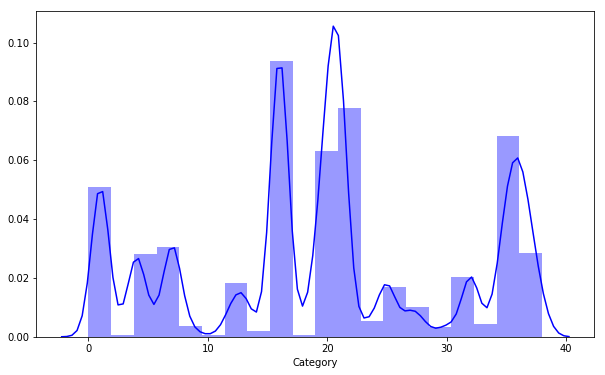

In [27]:
plt.figure(figsize=(10,6))
#sns.distplot(train_unique['Category'], color='blue',bins=20)
train_unique['Category'].hist()
plt.show()

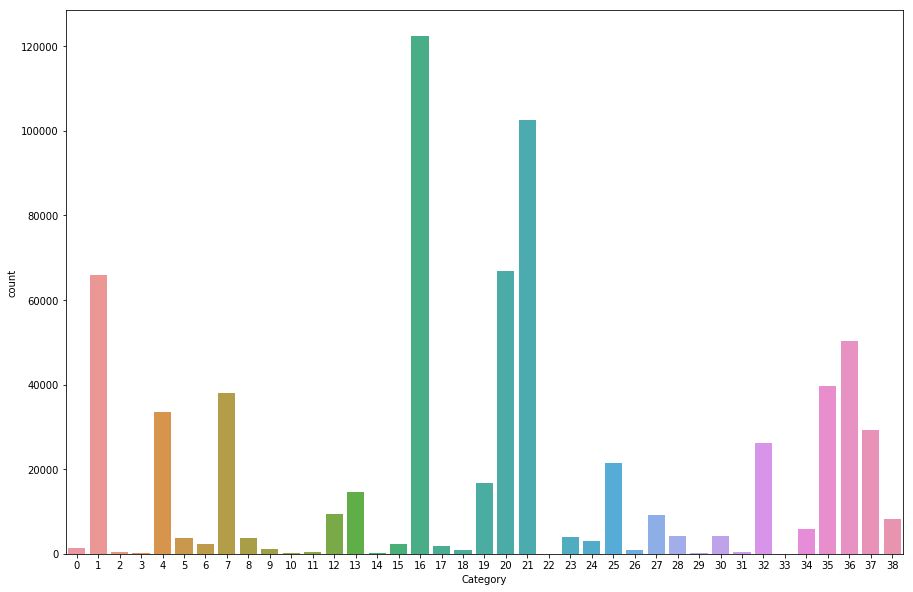

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(x='Category', data=train_unique)
plt.show()

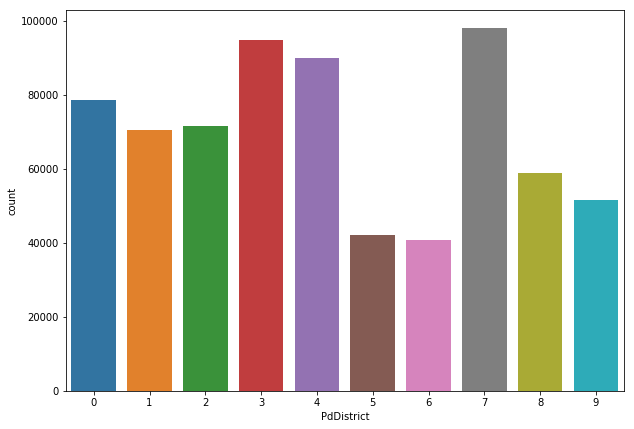

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(x='PdDistrict', data=train_unique)
plt.show()

In [35]:
tc = train_unique.corr()  ##it returns a correlation metrix means how columns are correlate to each other

In [36]:
## Correlation metrix
tc

,Category,DayOfWeek,PdDistrict,Resolution,X,Y
Category,1.000000,-0.000295,-0.032163,0.052596,-0.022780,0.000340
DayOfWeek,-0.000295,1.000000,0.005151,-0.019811,-0.000057,0.000117
PdDistrict,-0.032163,0.005151,1.000000,-0.048402,-0.332312,0.015570
Resolution,0.052596,-0.019811,-0.048402,1.000000,-0.085473,-0.003267
X,-0.022780,-0.000057,-0.332312,-0.085473,1.000000,0.588214
Y,0.000340,0.000117,0.015570,-0.003267,0.588214,1.000000


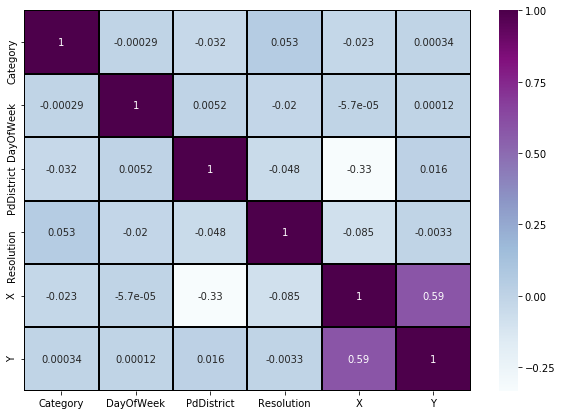

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(tc, annot=True, cmap='BuPu',linewidths=1,linecolor='black')  ## annot shows associated value
plt.show()

In [2]:
test = pd.read_csv('crime_test.csv', parse_dates=['Dates'])
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [3]:
test = test.drop(['Id','Address'], axis=1)

In [4]:
test

,Dates,DayOfWeek,PdDistrict,X,Y
0,2015-05-10 23:59:00,Sunday,BAYVIEW,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,-122.437394,37.721412
5,2015-05-10 23:40:00,Sunday,TARAVAL,-122.459024,37.713172
6,2015-05-10 23:30:00,Sunday,INGLESIDE,-122.425616,37.739351
7,2015-05-10 23:30:00,Sunday,INGLESIDE,-122.412652,37.739750
8,2015-05-10 23:10:00,Sunday,MISSION,-122.418700,37.765165
9,2015-05-10 23:10:00,Sunday,CENTRAL,-122.413935,37.798886


In [5]:
print(type(test['Dates']))
type(test['Dates'][0])

<class 'pandas.core.series.Series'>


pandas._libs.tslibs.timestamps.Timestamp

In [6]:
test.set_index(keys='Dates', inplace=True)

In [7]:
test.head(n=7)

,DayOfWeek,PdDistrict,X,Y
Dates,,,,
2015-05-10 23:59:00,Sunday,BAYVIEW,-122.399588,37.735051
2015-05-10 23:51:00,Sunday,BAYVIEW,-122.391523,37.732432
2015-05-10 23:50:00,Sunday,NORTHERN,-122.426002,37.792212
2015-05-10 23:45:00,Sunday,INGLESIDE,-122.437394,37.721412
2015-05-10 23:45:00,Sunday,INGLESIDE,-122.437394,37.721412
2015-05-10 23:40:00,Sunday,TARAVAL,-122.459024,37.713172
2015-05-10 23:30:00,Sunday,INGLESIDE,-122.425616,37.739351


In [9]:
test.info()
print('\n')
test.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 884262 entries, 2015-05-10 23:59:00 to 2003-01-01 00:01:00
Data columns (total 4 columns):
DayOfWeek     884262 non-null object
PdDistrict    884262 non-null object
X             884262 non-null float64
Y             884262 non-null float64
dtypes: float64(2), object(2)
memory usage: 33.7+ MB




,X,Y
count,884262.000000,884262.000000
mean,-122.422693,37.771476
std,0.030985,0.484824
min,-122.513642,37.707879
25%,-122.433069,37.752374
50%,-122.416517,37.775421
75%,-122.406959,37.784353
max,-120.500000,90.000000


In [10]:
## Identifying the duplicate rows or entries in dataset

dups = test.duplicated()
print(sum(dups))
## here duplicated() returns a bool true false value

733343


In [11]:
## Remove duplicate data

test_unique = test.drop_duplicates()
print(test_unique.shape , test.shape)

(150919, 4) (884262, 4)


In [12]:
test_unique.columns

Index(['DayOfWeek', 'PdDistrict', 'X', 'Y'], dtype='object')

In [13]:
from sklearn import preprocessing

In [15]:
le = preprocessing.LabelEncoder()
label_dayofweek = le.fit_transform(test_unique['DayOfWeek'])
print(le.classes_)          ## it returns the unique classes present in that column
test_unique['DayOfWeek']=label_dayofweek
print('\n')
print(set(test_unique['DayOfWeek']))

['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']


{0, 1, 2, 3, 4, 5, 6}


C:\Users\Sanjib\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [19]:
#set(test_unique['PdDistrict'])

label_pdDistrict = le.fit_transform(test_unique['PdDistrict'])
print(le.classes_)       ## it returns the unique classes present in that column
test_unique['PdDistrict']=label_pdDistrict
print('\n')
print(set(test_unique['PdDistrict']))

['BAYVIEW' 'CENTRAL' 'INGLESIDE' 'MISSION' 'NORTHERN' 'PARK' 'RICHMOND'
 'SOUTHERN' 'TARAVAL' 'TENDERLOIN']


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


C:\Users\Sanjib\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [21]:
set(test_unique['PdDistrict'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [41]:
train_unique.head(n=10)

,Category,DayOfWeek,PdDistrict,Resolution,X,Y
Dates,,,,,,
2015-05-13 23:53:00,37,6,4,0,-122.425892,37.774599
2015-05-13 23:53:00,21,6,4,0,-122.425892,37.774599
2015-05-13 23:33:00,21,6,4,0,-122.424363,37.800414
2015-05-13 23:30:00,16,6,4,11,-122.426995,37.800873
2015-05-13 23:30:00,16,6,5,11,-122.438738,37.771541
2015-05-13 23:30:00,16,6,2,11,-122.403252,37.713431
2015-05-13 23:30:00,36,6,2,11,-122.423327,37.725138
2015-05-13 23:30:00,36,6,0,11,-122.371274,37.727564
2015-05-13 23:00:00,16,6,6,11,-122.508194,37.776601


In [42]:
test_unique.head(n=10)

,DayOfWeek,PdDistrict,X,Y
Dates,,,,
2015-05-10 23:59:00,3,0,-122.399588,37.735051
2015-05-10 23:51:00,3,0,-122.391523,37.732432
2015-05-10 23:50:00,3,4,-122.426002,37.792212
2015-05-10 23:45:00,3,2,-122.437394,37.721412
2015-05-10 23:40:00,3,8,-122.459024,37.713172
2015-05-10 23:30:00,3,2,-122.425616,37.739351
2015-05-10 23:30:00,3,2,-122.412652,37.739750
2015-05-10 23:10:00,3,3,-122.418700,37.765165
2015-05-10 23:10:00,3,1,-122.413935,37.798886


In [44]:
x = train_unique.drop('Category',axis=1)
y = train_unique['Category']

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [60]:
from sklearn.model_selection import KFold , cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)  

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [61]:
score = cross_val_score(knn ,x_train,y_train, cv = k_fold, scoring="accuracy")
print(score)
print('\n')
print(np.mean(score))

[0.25920449 0.25611847 0.26001886 0.25841156 0.25764005 0.26051177
 0.25895287 0.25387368 0.25736697 0.25663831]


0.2578737020098358


In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')

In [66]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
rf.score(x_train,y_train)

0.5654392476897492